# Model Development
Part of Data Analysis with Python course provided by IBM through Cognitive Course. This is module 4, after exploring the data in the previous part, Exploratory Data Analysis, we will developed a prediction model.

## Objectives
In this module we will develop several models that will predict the price of the car using the variables or features.

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in dataframe `df`:

In [2]:
df = pd.read_csv("automobileEDA.csv", header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression
### Linear Regression
Linear regression yield a linear function that predicts the response variable (dependent) as a function of the predictor variable (independent).
$$\hat{Y} = a + bX$$

In [3]:
# Load the modules for linear regression
from sklearn.linear_model import LinearRegression

# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

For this example, we want to look at how `highway-mpg` can help us predict car `price`.

In [4]:
# Assign predictor variable to X and response variable to Y
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model
lm.fit(X, Y)

LinearRegression()

In [5]:
# We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [6]:
# The value of the intercept (a)
lm.intercept_

38423.3058581574

In [7]:
# The value of the slope (b)
lm.coef_

array([-821.73337832])

### Final estimated linear model
As mentioned above, the linear model structure is:
$$\hat{Y} = a + bX$$
Plugging in the actual values we get:
$$\textbf{price} = 38423.31 - 821.73 \times \textbf{highway-mpg}$$

### Another example for linear regression using different variable
Now, we will use `engine-size` as predictor variable for the `price`.

In [8]:
# Start by creating another Linear Regression object
lm1 = LinearRegression()
lm1

LinearRegression()

In [9]:
# Fitting the data directly in the lm1 object
lm1.fit(df[['engine-size']], df['price'])

LinearRegression()

In [10]:
# The intercept value
lm1.intercept_

-7963.338906281024

In [11]:
# The slope value
lm1.coef_

array([166.86001569])

Equation of the regression function is:
$$\textbf{price} = -7963.34 + 166.86 \times \textbf{engine-size}$$

### Multiple Linear Regression
It simply means that the function has more than one predictor variable (e.g. X, X1, X2, ...) with linear relation to the response variable (i.e. Y). Most of the real world problem involve multiple predictors. Here, we will use four predictor variables:
- `horsepower`
- `curb-weight`
- `engine-size`
- `highway-mpg`

The regression equation becomes:
$$\hat{Y} = a + b_1X_1 + b_2X_2 + b_3X_3 + b_4X_4$$ 

In [12]:
# Predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [13]:
# Fit the model
lm.fit(Z, df['price'])

LinearRegression()

In [14]:
# The intercept (a) value
lm.intercept_

-15806.624626329227

In [15]:
# The coefficients value (b1, b2, b3, b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Final estimated multiple linear model
The estimated linear model becomes:
$$\textbf{price}=-15806.62+53.50\times \textbf{horsepower}+4.71\times \textbf{curb-weight}+81.53\times \textbf{engine-size}+36.06\times \textbf{highway-mpg}$$

### Another example for multiple linear model
Now, we'll use only two predictor variables:
- `normalized-losses`
- `highway-mpg`

In [16]:
# Fit the model
lm1.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [17]:
# The intercept
lm1.intercept_

38201.31327245728

In [18]:
# The slope
lm1.coef_

array([   1.49789586, -820.45434016])

The equation is:
$$\textbf{price}=38201.31+1.50\times \textbf{normalized-losses}-820.45\times \textbf{highway-mpg}$$

## 2. Model Evaluation using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

In [19]:
# Import visualization package
import seaborn as sns
%matplotlib inline

### Regression plot
An excellent way to visualize the fit of our model is by using **regression plots**.

This plot show a combination of scattered data points (**scatterplot**), as well as the fitted **linear regression** line going through the data.

Let's visualize `highway-mpg` as potential predictor variable of `price`:

(0.0, 48178.46362557273)

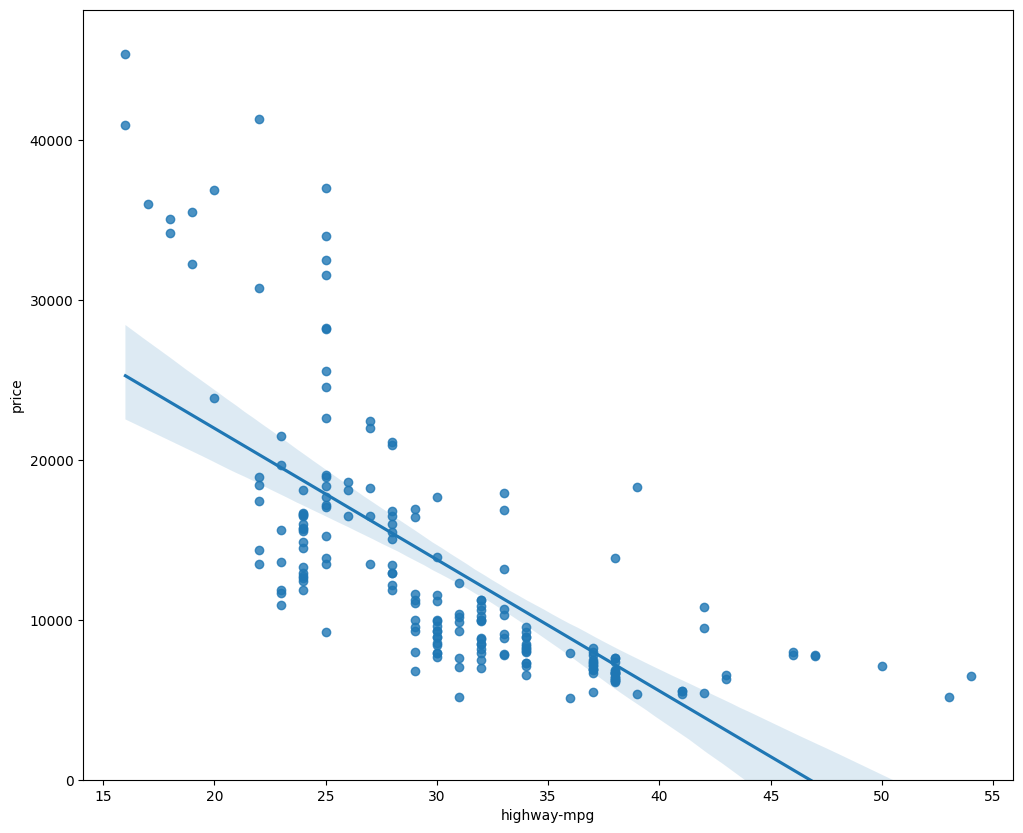

In [23]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

We can see that the `highway-mpg` is negatively correlated to the `price` since the regression slope is negative.

However, let's keep in mind that the data points is to scattered around the regression line that indicate the linear model is not the best fit for our data.

Let's compare this plot with the regression plot of `peak-rpm`.

(0.0, 47414.1)

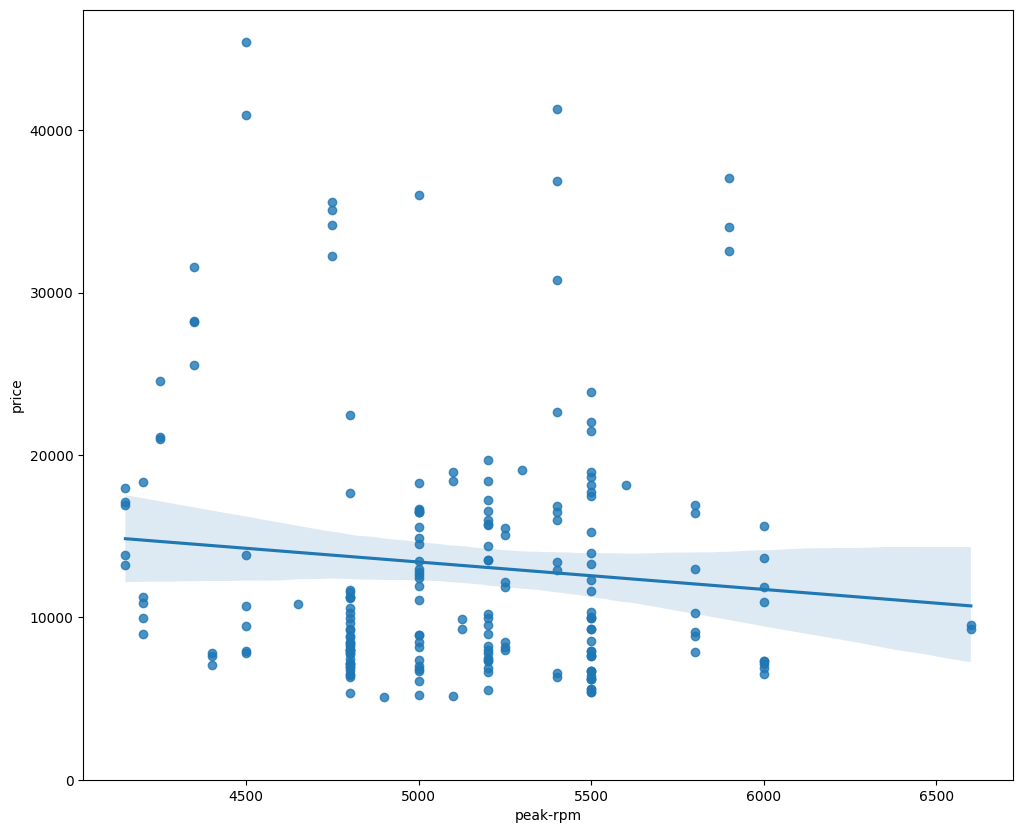

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Comparing the regression plot of `peak-rpm` and `highway-mpg`, we see that the points for `highway-mpg` are much closer to the generated line and, on average, decrease. The points for `peak-rpm` have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the `peak-rpm` increases.

In [25]:
# Correlation value between `peak-rpm`, `highway-mpg`, and `price`
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual plot
A good way to visualize the variance of the data is to use a **residual plot**.

What is a **residual**?
* The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression ine.

So what is a **residual plot**?
* A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?
* We look at the spread of the residuals:
- If the points in a residual plot are **randomly spread out around the x-axis**, then a **linear model is appropriate** for the data.

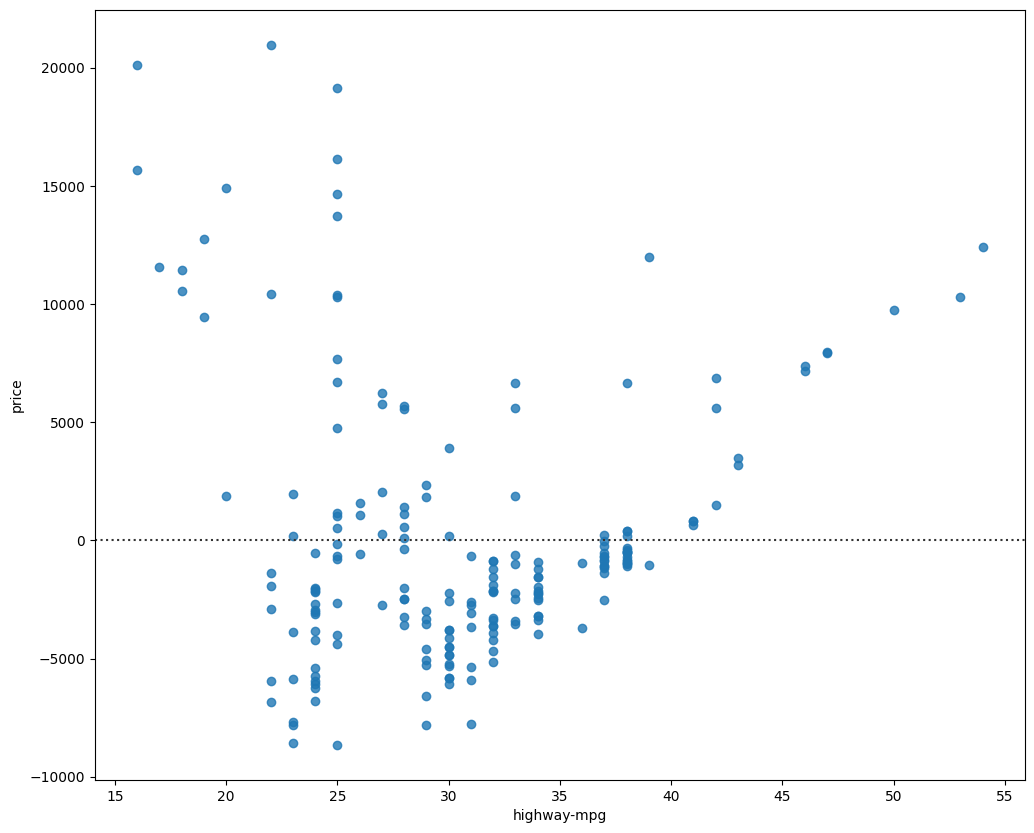

In [26]:
plt.figure(figsize=(12,10))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

What is this plot telling us?

We can see that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a **non-linear model** is more appropriate for this data

### Distribution plot
How do we visualize a model for *Multiple Linear Regression*? This gets a bit more complicated because we can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the **distribution plot**. We can look at the distribution of the fitted values from the model and compare it to the distribution of the actual values.

In [33]:
# Prediction from the model
Yhat = lm.predict(Z)

In [38]:
Y = [Yhat, df['price']]

<Figure size 1200x1000 with 0 Axes>

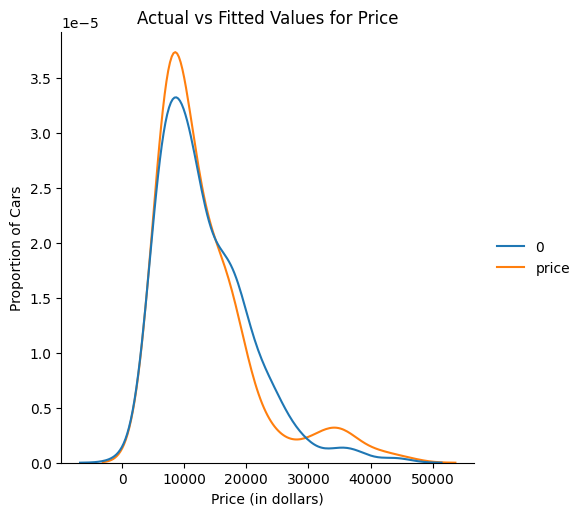

In [37]:
plt.figure(figsize=(12,10))

sns.displot(Y, kind='kde')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## 3. Polynomial Regression and Pipelines
**Polynomial regression** is a particular case of the general linear regression model of multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

$$\textbf{Quadratic - 2nd Order}$$
$$\hat{Y}=a+b_1X+b_2X^2$$

$$\textbf{Cubic - 3rd Order}$$
$$\hat{Y}=a+b_1X+b_2X^2+b_3X^3$$

$$\textbf{Higher-Order (n-th Order)}$$
$$\hat{Y}=a+b_1X+b_2X^2+b_3X^3+\ldots$$

We saw earlier that a linear model did not provide the best fit while using `highway-mpg` as the predictor variable. Let's see if we can try fitting a polynomial modet to the data instead.

In [39]:
def PlotPolly(model, indep_var, dep_var, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(indep_var, dep_var, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [40]:
# Let's get the variables
x = df['highway-mpg']
y = df['price']

In [41]:
# Fit the polynomial (3rd order)
f = np.polyfit(x, y, 3)
# Display the polynomial function
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


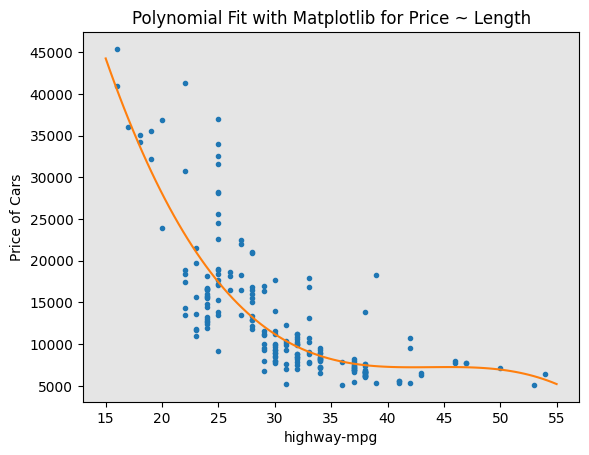

In [42]:
# Plot the function
PlotPolly(p, x, y, 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


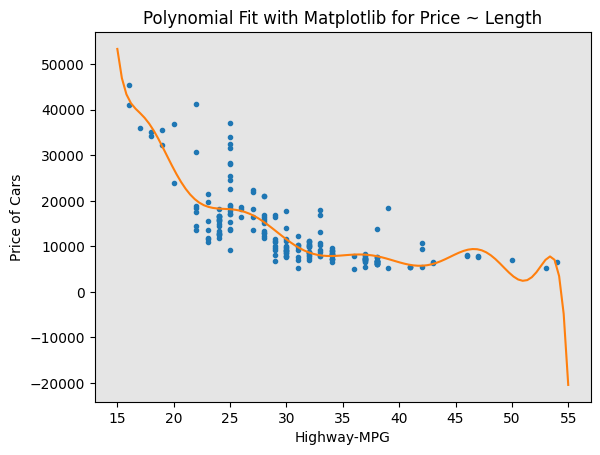

In [43]:
# Let's try 11th order polynomial model
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway-MPG')

Now, how about *Multivariate Polynomial* function? It will become more complicated since there might be more than one variable in any term (linear term, quadratic term, cubic term, and so on).

For example, the expression for a second-order polynomial with two variables is given by:

$$\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_{1}^2 + b_5 X_{2}^2$$

Luckily, we have a module to help us.

In [44]:
# Import the module
from sklearn.preprocessing import PolynomialFeatures

In [45]:
# Create a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [46]:
Z_pr = pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.

In [47]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.

In [48]:
Z_pr.shape

(201, 15)

### Pipeline
Data Pipelines simplify the steps of processing the data. We use the module **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline

In [49]:
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [50]:
Input = [('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model', LinearRegression())]

In [51]:
# Create the pipeline using the input
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [52]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [53]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Let's try another example if we want to create pipeline that standardizes the data then produce a prediction using linear regression without transforming the features.

In [54]:
Input1 = [('scale', StandardScaler()),
          ('model', LinearRegression())]
pipe1 = Pipeline(Input1)
pipe1.fit(Z, y)

ypipe1 = pipe1.predict(Z)
ypipe1[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 4. Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

* **R^2** / **R-squared**
* **Mean Squared Error** (**MSE**)

**R-squared**

R-squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error** (**MSE**)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

In [55]:
# 'highway-mpg' fitting model
lm.fit(df[['highway-mpg']], df['price'])

# Calculate the R-squared
print('The R-square is: ', lm.score(df[['highway-mpg']], df['price']))

The R-square is:  0.4965911884339176


We can say that approximately $49.66\%$ of the variation of the price is explained by this simple linear model, which we have built using the `highway-mpg` data.

In [56]:
# Import library for calculating MSE
from sklearn.metrics import mean_squared_error

# first, we need a predict values
Yhat = lm.predict(df[['highway-mpg']])

# calculate the MSE
mse = mean_squared_error(df['price'], Yhat)
print(f'The MSE of price and predicted value is: {mse}')

The MSE of price and predicted value is: 31635042.944639888


### Model 2: Multiple Linear Regression
Let's calculate the R-square.

In [58]:
# fit the model
lm.fit(Z, df['price'])

# find the R-square
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that approximately $80.94\%$ of the variation of `price` is explained by this multiple linear regression model.

In [59]:
# Now, we calculate MSE
Y_predict = lm.predict(Z)
mse_multi = mean_squared_error(df['price'], Y_predict)
print(f"The MSE of price and predicted value is: {mse_multi}")

The MSE of price and predicted value is: 11980366.87072649


### Model 3: Polynomial Fit

In [60]:
# Need a new library
from sklearn.metrics import r2_score

# The R-square value
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906521


Approximately $67.42\%$ of the variation is explained by this polynomial fit.

In [61]:
# The MSE value
mean_squared_error(df['price'], p(x))

20474146.426361203

## 5. Prediction and Decision Making
### Prediction
In the previous section, we trained the model using the method **fit**. Now we will use the method **predict** to produce a prediction.

In [62]:
# create a new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [63]:
# fit the model
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
lm

LinearRegression()

In [65]:
# produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\Master Com\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

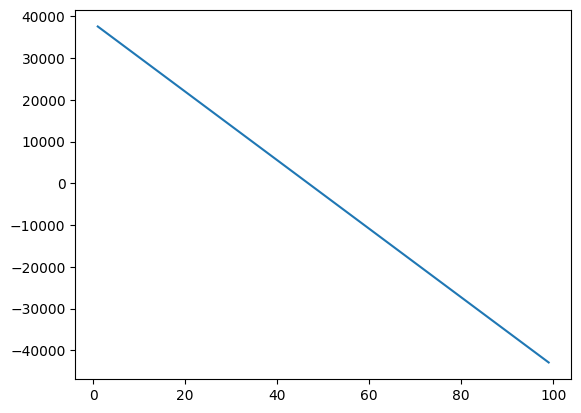

In [66]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

* What is a good R-squared value?

When comparing models, the model with the **higher R-squared value** is a better fit for the data.

* What is a good MSE?

When comparing models, the model with the **smallest MSE value** is a better fit for the data.

Let's take a look at the values for the different models.

Simple Linear Regression: Using `highway-mpg` as a Predictor Variable of `price`.

* R-squared: 0.49659118843391759
* MSE: 3.16 x10^7

Multiple Linear Regression: Using `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg` as Predictor Variables of `price`.

* R-squared: 0.80896354913783497
* MSE: 1.2 x10^7

Polynomial Fit: Using `highway-mpg` as a Predictor Variable of `price`.

* R-squared: 0.6741946663906514
* MSE: 2.05 x 10^7

### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the **MSE** and **R^2**.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

* MSE: The MSE of SLR is $3.16\times10^7$ while MLR has an MSE of $1.2\times10^7$. The MSE of MLR is much smaller.
* R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR ($0.497$) is very small compared to the R-squared for the MLR ($0.809$).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

### Simple Linear Model (SLR) vs Polynomial Fit

* MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
* R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting `price` with `highway-mpg` as a predictor variable.


### Multiple Linear Regression (MLR) vs Polynomial Fit

* MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
* R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

## Conclusion
Comparing these three models, we conclude that the **MLR model** is the best model to predict `price` from our dataset.

This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.